
# 📘 S1.1 時間序列資料基礎

本課程是時間序列分析特別專題的第一部分，專注於時間序列資料的基礎知識和操作。時間序列資料是按時間順序排列的數據點集合，在財務分析、銷售預測、網站流量監控等領域有著廣泛應用。本課程將幫助您建立使用 Pandas 處理時間序列資料的基本技能。


## 🎯 教學目標

- 🕒 學習創建和操作時間索引
- 📆 掌握基本時間運算和特性提取
- 📊 學習時間序列基本視覺化技巧
- 🔄 了解日期範圍與頻率設定方法

In [7]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 設置隨機種子確保結果可重現
np.random.seed(42)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 📊 1. 時間索引創建

Pandas 提供了多種創建時間索引的方法，讓我們從基本的時間對象開始。

In [12]:
# 1.1 創建單一時間戳
timestamp = pd.Timestamp('2023-05-15 14:30:00')
print(f"單一時間戳: {timestamp}")
print(f"類型: {type(timestamp)}")
print(f"年份: {timestamp.year}, 月份: {timestamp.month}, 日期: {timestamp.day}")
print(f"時: {timestamp.hour}, 分: {timestamp.minute}, 秒: {timestamp.second}")

# 從 Python datetime 對象創建時間戳
py_datetime = datetime(2023, 5, 15, 14, 30, 0)
pd_timestamp = pd.Timestamp(py_datetime)
print(f"\n從 Python datetime 創建: {pd_timestamp}")

# 1.2 創建時間索引
dates = pd.DatetimeIndex(['2023-05-01', '2023-05-15', '2023-06-01', '2023-06-15'])
time_series = pd.Series([100, 105, 110, 115], index=dates)
print("\n使用 DatetimeIndex 創建時間序列:")
print(time_series)

# 1.3 從不同格式解析日期
# 標準格式
date_standard = pd.to_datetime('2023-05-15')
print(f"\n標準格式日期: {date_standard}")

# 不同格式的日期字符串
dates_diverse = ['5/15/2023', '05.16.2023', '17-May-2023', '2023/05/18']
parsed_dates = pd.to_datetime(dates_diverse, format="mixed")
print(f"\n解析不同格式的日期:")
print(parsed_dates)

# 指定格式解析
custom_format = '15$05$2023'
parsed_with_format = pd.to_datetime(custom_format, format='%d$%m$%Y')
print(f"\n使用自定義格式解析: {parsed_with_format}")

# 處理錯誤
try:
    # 嘗試解析錯誤格式
    pd.to_datetime('not-a-date')
except Exception as e:
    print(f"\n處理錯誤格式 (報錯): {type(e).__name__}: {e}")

# 使用 errors='coerce' 將錯誤轉換為 NaT
mixed_dates = ['2023-05-15', 'not-a-date', '2023-05-16']
parsed_with_errors = pd.to_datetime(mixed_dates, errors='coerce')
print(f"\n使用 errors='coerce' 處理錯誤:")
print(parsed_with_errors)

單一時間戳: 2023-05-15 14:30:00
類型: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
年份: 2023, 月份: 5, 日期: 15
時: 14, 分: 30, 秒: 0

從 Python datetime 創建: 2023-05-15 14:30:00

使用 DatetimeIndex 創建時間序列:
2023-05-01    100
2023-05-15    105
2023-06-01    110
2023-06-15    115
dtype: int64

標準格式日期: 2023-05-15 00:00:00

解析不同格式的日期:
DatetimeIndex(['2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18'], dtype='datetime64[ns]', freq=None)

使用自定義格式解析: 2023-05-15 00:00:00

處理錯誤格式 (報錯): DateParseError: Unknown datetime string format, unable to parse: not-a-date, at position 0

使用 errors='coerce' 處理錯誤:
DatetimeIndex(['2023-05-15', 'NaT', '2023-05-16'], dtype='datetime64[ns]', freq=None)


解說：
- `pd.Timestamp` 創建單一時間點，類似於 Python 的 datetime 但有更多功能
- `pd.DatetimeIndex` 創建時間索引數組，可用於 Series 或 DataFrame 的索引
- `pd.to_datetime` 將各種格式的日期字符串轉換為 Timestamp
- 可以使用 `format` 參數指定日期格式
- `errors='coerce'` 可將無法解析的日期轉換為 `NaT` (Not a Time)
- 這些功能使得處理各種來源和格式的日期數據變得簡單


## 📊 2. 基本時間操作

時間索引提供了豐富的功能來訪問和操作時間序列數據。

In [13]:
# 2.1 創建示例時間序列數據
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
ts_data = pd.Series(np.random.normal(0, 1, len(date_range)), index=date_range)
print("示例時間序列數據 (前5行):")
print(ts_data.head())

# 2.2 訪問時間索引的屬性
print("\n訪問時間索引的各種屬性:")
date_attributes = pd.DataFrame({
    'year': ts_data.index.year[:5],
    'month': ts_data.index.month[:5],
    'day': ts_data.index.day[:5],
    'dayofweek': ts_data.index.dayofweek[:5],  # 0=星期一, 6=星期日
    'quarter': ts_data.index.quarter[:5],
    'is_month_start': ts_data.index.is_month_start[:5],
    'is_quarter_end': ts_data.index.is_quarter_end[:5]
})
print(date_attributes)

# 2.3 根據時間屬性選擇數據
# 選擇特定月份的數據
march_data = ts_data[ts_data.index.month == 3]
print(f"\n3月的數據 (共 {len(march_data)} 天):")
print(march_data.head())

# 選擇季度結束日的數據
quarter_end = ts_data[ts_data.index.is_quarter_end]
print(f"\n季度結束日的數據 (共 {len(quarter_end)} 天):")
print(quarter_end)

# 選擇工作日數據 (星期一至星期五)
weekday_data = ts_data[ts_data.index.dayofweek < 5]
print(f"\n工作日數據 (共 {len(weekday_data)} 天):")
print(weekday_data.head())

# 2.4 時間索引的算術運算
# 獲取明天的數據
date_to_check = pd.Timestamp('2023-02-15')
if date_to_check + pd.Timedelta(days=1) in ts_data.index:
    print(f"\n{date_to_check} 的數據: {ts_data[date_to_check]}")
    print(f"{date_to_check + pd.Timedelta(days=1)} 的數據: {ts_data[date_to_check + pd.Timedelta(days=1)]}")

# 獲取30天後的數據
if date_to_check + pd.Timedelta(days=30) in ts_data.index:
    print(f"{date_to_check + pd.Timedelta(days=30)} 的數據: {ts_data[date_to_check + pd.Timedelta(days=30)]}")

# 2.5 使用日期偏移
next_month_end = date_to_check + pd.offsets.MonthEnd()
print(f"\n當月月底: {next_month_end}")

next_quarter_end = date_to_check + pd.offsets.QuarterEnd()
print(f"當季季底: {next_quarter_end}")

next_business_day = date_to_check + pd.offsets.BusinessDay()
print(f"下一個工作日: {next_business_day}")

示例時間序列數據 (前5行):
2023-01-01    0.50
2023-01-02   -0.14
2023-01-03    0.65
2023-01-04    1.52
2023-01-05   -0.23
Freq: D, dtype: float64

訪問時間索引的各種屬性:
   year  month  day  dayofweek  quarter  is_month_start  is_quarter_end
0  2023      1    1          6        1            True           False
1  2023      1    2          0        1           False           False
2  2023      1    3          1        1           False           False
3  2023      1    4          2        1           False           False
4  2023      1    5          3        1           False           False

3月的數據 (共 31 天):
2023-03-01    0.98
2023-03-02   -0.48
2023-03-03   -0.19
2023-03-04   -1.11
2023-03-05   -1.20
Freq: D, dtype: float64

季度結束日的數據 (共 4 天):
2023-03-31   0.51
2023-06-30   0.63
2023-09-30   1.16
2023-12-31   0.69
dtype: float64

工作日數據 (共 260 天):
2023-01-02   -0.14
2023-01-03    0.65
2023-01-04    1.52
2023-01-05   -0.23
2023-01-06   -0.23
dtype: float64

2023-02-15 00:00:00 的數據: -0.7198442083947086
202

解說：
- 時間索引提供多種屬性來訪問時間的不同部分（年、月、日等）
- 可以使用這些屬性進行數據過濾和選擇
- `pd.Timedelta` 用於表示時間間隔，可以與 Timestamp 進行算術運算
- `pd.offsets` 提供各種日期偏移功能，如月末、季末、工作日等
- 這些功能使得時間序列數據的選取和操作變得簡單靈活


## 📊 3. 簡單時間序列視覺化

視覺化是理解時間序列數據的重要工具，讓我們來看看如何創建基本的時間序列圖表。

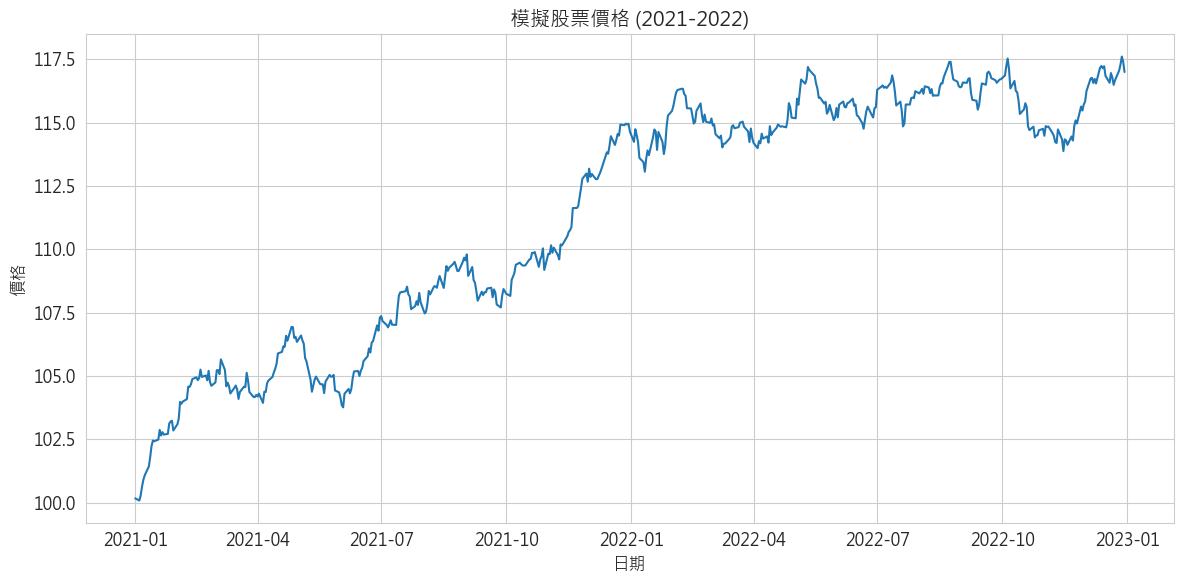

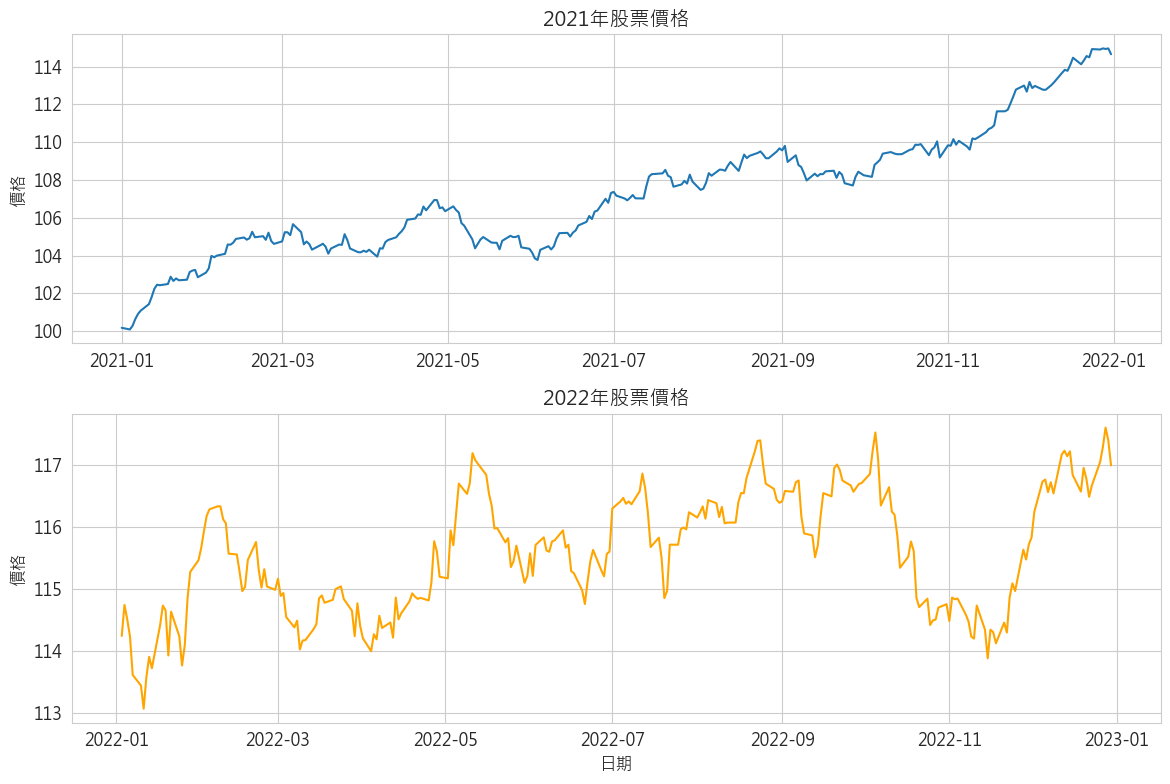

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\235129252.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = stock_data.resample('M').mean()


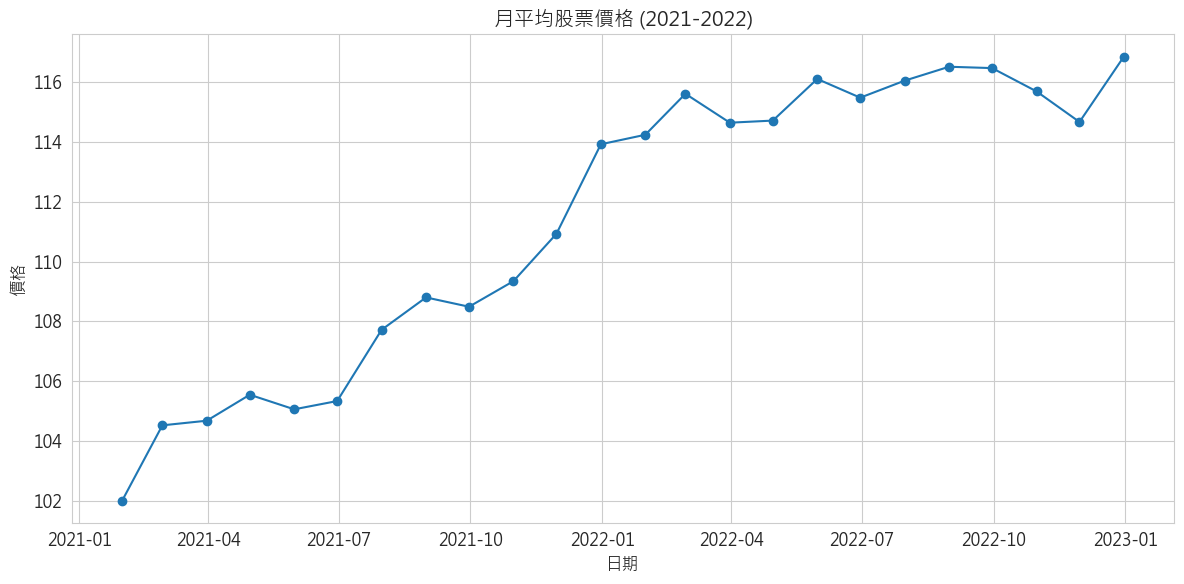

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\235129252.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stock_data.resample('M').last().pct_change() * 100


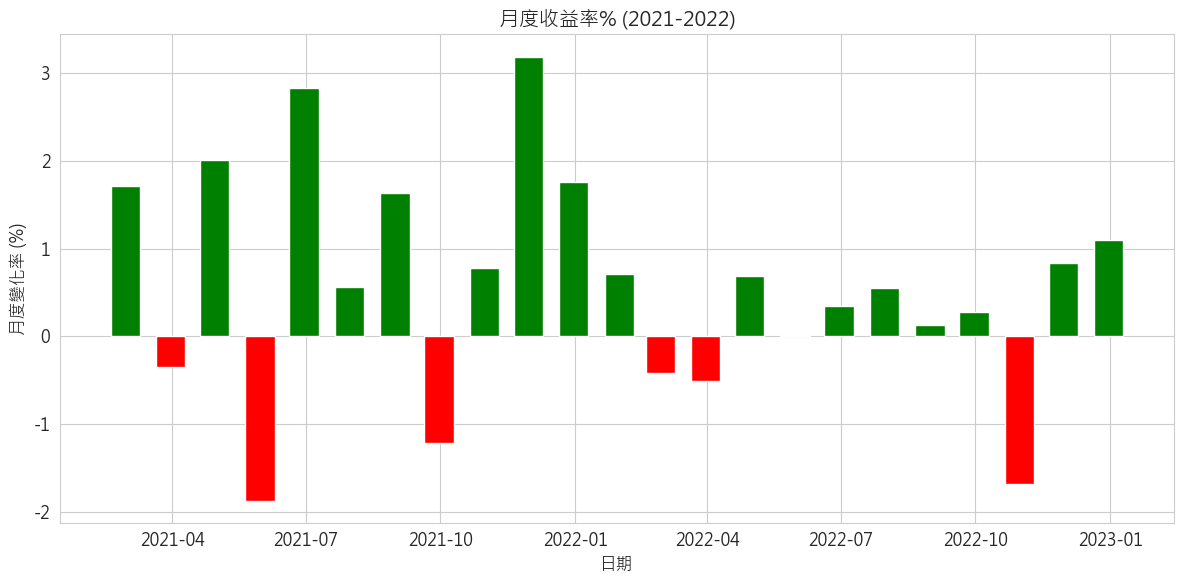

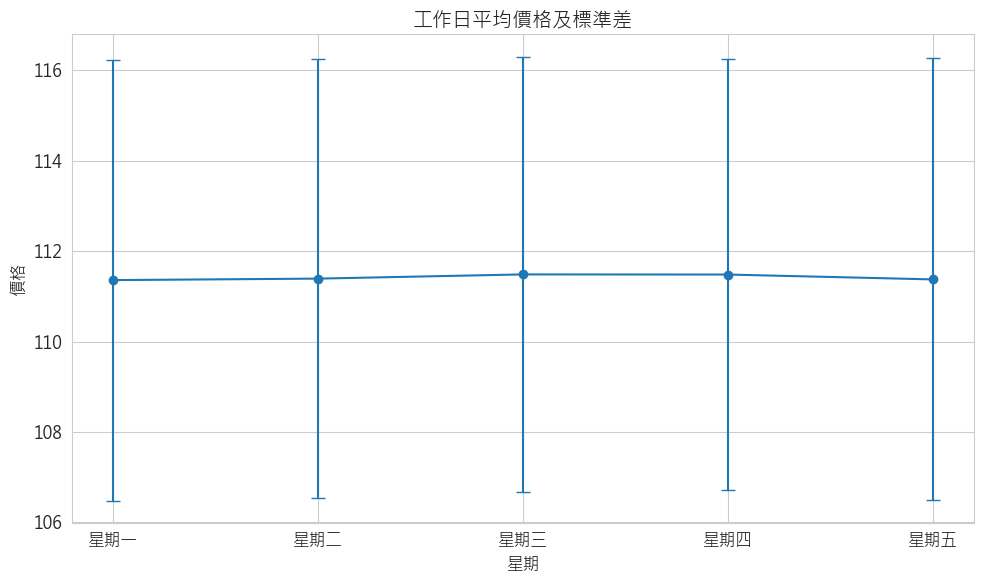

In [15]:
# 3.1 創建示例時間序列數據（模擬股票價格）
dates = pd.date_range('2021-01-01', '2022-12-31', freq='B')  # 工作日
n = len(dates)

# 創建具有趨勢和季節性的時間序列
time = np.arange(n)
trend = time / 100  # 長期上升趨勢
seasonal = 0.5 * np.sin(2 * np.pi * time / 252)  # 一年的季節性 (252個工作日)
noise = np.random.normal(0, 0.3, n)  # 隨機噪聲

stock_price = 100 + trend + seasonal + noise.cumsum()  # 累積噪聲產生隨機遊走
stock_data = pd.Series(stock_price, index=dates, name='Stock Price')

# 3.2 繪製基本時間序列圖
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data.values)
plt.title('模擬股票價格 (2021-2022)')
plt.xlabel('日期')
plt.ylabel('價格')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.3 分開查看不同年份的數據
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# 2021年數據
stock_data_2021 = stock_data['2021']
axes[0].plot(stock_data_2021.index, stock_data_2021.values)
axes[0].set_title('2021年股票價格')
axes[0].set_ylabel('價格')
axes[0].grid(True)

# 2022年數據
stock_data_2022 = stock_data['2022']
axes[1].plot(stock_data_2022.index, stock_data_2022.values, color='orange')
axes[1].set_title('2022年股票價格')
axes[1].set_xlabel('日期')
axes[1].set_ylabel('價格')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 3.4 按月份彙總和可視化數據
monthly_data = stock_data.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values, marker='o')
plt.title('月平均股票價格 (2021-2022)')
plt.xlabel('日期')
plt.ylabel('價格')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.5 使用柱狀圖顯示月度變化率
monthly_returns = stock_data.resample('M').last().pct_change() * 100

# 根據每個月報酬率決定顏色
colors = ['green' if val > 0 else 'red' for val in monthly_returns.values]

# 畫柱狀圖
plt.figure(figsize=(12, 6))
plt.bar(monthly_returns.index, monthly_returns.values, width=20, color=colors)
plt.title('月度收益率% (2021-2022)')
plt.xlabel('日期')
plt.ylabel('月度變化率 (%)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# 3.6 可視化一周內的模式
weekday_means = stock_data.groupby(stock_data.index.dayofweek).mean()
weekday_std = stock_data.groupby(stock_data.index.dayofweek).std()
days = ['星期一', '星期二', '星期三', '星期四', '星期五']

plt.figure(figsize=(10, 6))
plt.errorbar(days, weekday_means, yerr=weekday_std, fmt='o-', capsize=5)
plt.title('工作日平均價格及標準差')
plt.xlabel('星期')
plt.ylabel('價格')
plt.grid(True)
plt.tight_layout()
plt.show()

解說：
- 時間序列的基本視覺化方法包括線圖、柱狀圖、錯誤棒圖等
- 可以使用切片操作（如 `stock_data['2021']`）選取特定時間範圍的數據
- `resample()` 方法可以將時間序列彙總到不同的頻率（如月、季、年）
- 通過 `groupby()` 可以找出工作日模式等時間相關特徵
- 可視化有助於發現趨勢、季節性、異常值等時間序列特性


## 📊 4. 日期範圍與頻率

了解如何創建各種頻率的日期範圍對於時間序列分析非常重要。

In [16]:
# 4.1 創建不同頻率的日期範圍
# 每日頻率 (D)
daily_range = pd.date_range(start='2023-01-01', periods=10, freq='D')
print("每日頻率 (D):")
print(daily_range)

# 工作日頻率 (B)
business_range = pd.date_range(start='2023-01-01', periods=10, freq='B')
print("\n工作日頻率 (B):")
print(business_range)

# 每小時頻率 (H)
hourly_range = pd.date_range(start='2023-01-01', periods=10, freq='H')
print("\n每小時頻率 (H):")
print(hourly_range)

# 每週頻率 (W)，星期日結束
weekly_range = pd.date_range(start='2023-01-01', periods=10, freq='W')
print("\n每週頻率 (W):")
print(weekly_range)

# 每月頻率 (M)，月末
monthly_range = pd.date_range(start='2023-01-01', periods=10, freq='M')
print("\n每月頻率 (M)，月末:")
print(monthly_range)

# 每月頻率 (MS)，月初
monthly_start_range = pd.date_range(start='2023-01-01', periods=10, freq='MS')
print("\n每月頻率 (MS)，月初:")
print(monthly_start_range)

# 季度頻率 (Q)，季末
quarterly_range = pd.date_range(start='2023-01-01', periods=5, freq='Q')
print("\n季度頻率 (Q)，季末:")
print(quarterly_range)

# 4.2 自定義頻率和日期偏移
# 每4小時
custom_hourly = pd.date_range(start='2023-01-01', periods=10, freq='4H')
print("\n每4小時:")
print(custom_hourly)

# 半月頻率
semi_monthly = pd.date_range(start='2023-01-01', periods=10, freq='SM')
print("\n半月頻率 (SM):")
print(semi_monthly)

# 自定義工作日偏移 (每兩個工作日)
custom_business = pd.date_range(start='2023-01-01', periods=10, freq='2B')
print("\n每兩個工作日 (2B):")
print(custom_business)

# 4.3 複合頻率
# 每月第3個星期一
monthly_3rd_monday = pd.date_range(start='2023-01-01', periods=10, freq='WOM-3MON')
print("\n每月第3個星期一 (WOM-3MON):")
print(monthly_3rd_monday)

# 小結常用頻率
print("\n常用頻率代碼:")
frequencies = {
    'S': '秒',
    'T' or 'min': '分鐘',
    'H': '小時',
    'D': '日曆日',
    'B': '工作日',
    'W': '週',
    'M': '月末',
    'MS': '月初',
    'Q': '季末',
    'QS': '季初',
    'A' or 'Y': '年末',
    'AS' or 'YS': '年初',
    'BM': '工作日月末',
    'BMS': '工作日月初',
    'BQ': '工作日季末',
    'BQS': '工作日季初',
    'BA' or 'BY': '工作日年末',
    'BAS' or 'BYS': '工作日年初'
}

for code, desc in frequencies.items():
    print(f"{code}: {desc}")

每日頻率 (D):
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

工作日頻率 (B):
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13'],
              dtype='datetime64[ns]', freq='B')

每小時頻率 (H):
DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00', '2023-01-01 02:00:00',
               '2023-01-01 03:00:00', '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00', '2023-01-01 08:00:00',
               '2023-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='h')

每週頻率 (W):
DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22', '2023-01-29', '2023-02-05',
               '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05'],
       

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2903843652.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_range = pd.date_range(start='2023-01-01', periods=10, freq='H')
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2903843652.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_range = pd.date_range(start='2023-01-01', periods=10, freq='M')
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2903843652.py:33: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_range = pd.date_range(start='2023-01-01', periods=5, freq='Q')
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2903843652.py:39: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  custom_hourly = pd.date_range(start='2023-01-01', periods=10, freq='4H')
C:\Us

In [17]:
# 4.4 使用不同頻率創建時間序列數據
# 每月數據
monthly_values = np.random.normal(0, 1, 24)
monthly_index = pd.date_range(start='2022-01-01', periods=24, freq='M')
monthly_series = pd.Series(monthly_values, index=monthly_index)
print("\n月度時間序列數據:")
print(monthly_series.head())

# 季度數據
quarterly_values = np.random.normal(0, 1, 8)
quarterly_index = pd.date_range(start='2022-01-01', periods=8, freq='Q')
quarterly_series = pd.Series(quarterly_values, index=quarterly_index)
print("\n季度時間序列數據:")
print(quarterly_series)

# 4.5 日期範圍間的操作
# 獲取特定日期範圍內的數據
date_mask = (monthly_series.index >= '2022-04-01') & (monthly_series.index <= '2022-09-30')
filtered_data = monthly_series[date_mask]
print("\n2022年4月至9月的數據:")
print(filtered_data)

# 使用切片選取日期範圍
slice_data = monthly_series['2022-07':'2022-12']
print("\n使用切片選取2022年7月至12月的數據:")
print(slice_data)


月度時間序列數據:
2022-01-31    1.50
2022-02-28   -0.32
2022-03-31   -0.25
2022-04-30    1.33
2022-05-31    0.56
Freq: ME, dtype: float64

季度時間序列數據:
2022-03-31    0.82
2022-06-30    0.86
2022-09-30   -0.58
2022-12-31   -0.17
2023-03-31    0.28
2023-06-30   -0.25
2023-09-30    1.61
2023-12-31    0.49
Freq: QE-DEC, dtype: float64

2022年4月至9月的數據:
2022-04-30    1.33
2022-05-31    0.56
2022-06-30    0.46
2022-07-31    2.17
2022-08-31   -0.64
2022-09-30    0.93
Freq: ME, dtype: float64

使用切片選取2022年7月至12月的數據:
2022-07-31    2.17
2022-08-31   -0.64
2022-09-30    0.93
2022-10-31    0.06
2022-11-30    0.27
2022-12-31    1.53
Freq: ME, dtype: float64


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2783434390.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_index = pd.date_range(start='2022-01-01', periods=24, freq='M')
C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_2412\2783434390.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_index = pd.date_range(start='2022-01-01', periods=8, freq='Q')


解說：
- `pd.date_range()` 用於創建各種頻率的日期範圍
- 常用頻率代碼包括 D (日), B (工作日), H (小時), W (週), M (月末), MS (月初), Q (季度末)
- 可以設定具體的起始日期、結束日期或期數
- 可以組合頻率代碼創建複合頻率，如 '2H' 表示每兩小時
- 特殊頻率可以表示業務上有意義的時間點，如每月第三個星期一
- 這些頻率設定可以幫助創建規範化的時間序列數據


## 📋 5. 總結


在本課程中，我們學習了時間序列資料的基礎知識：

- **時間索引創建**：使用 `pd.Timestamp`, `pd.DatetimeIndex`, `pd.to_datetime` 等方法創建時間對象和索引
- **基本時間操作**：時間索引的屬性訪問、算術運算、日期偏移等操作
- **簡單時間序列視覺化**：使用線圖、柱狀圖等可視化時間序列數據，展示趨勢和模式
- **日期範圍與頻率**：使用 `pd.date_range` 創建各種頻率的日期範圍，了解日期頻率代碼

這些基礎知識為下一課程 "時間序列進階分析" 打下了堅實的基礎。在進階分析中，我們將學習重採樣、移動窗口計算、季節性分解和預測等更複雜的技術。